In [31]:
import numpy as np
import matplotlib.pyplot as plt

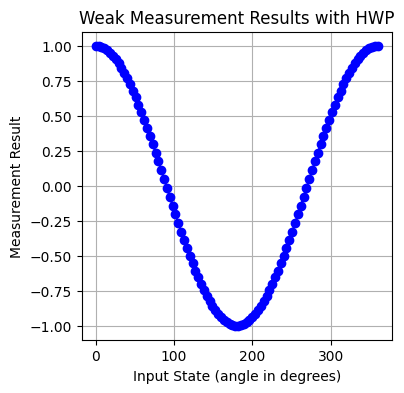

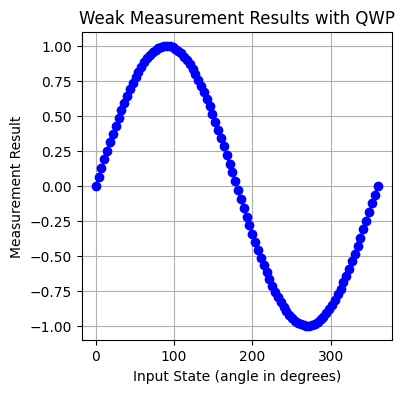

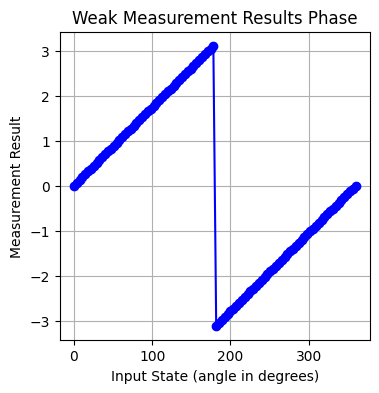

In [32]:
HWP = np.array([[1, 0], [0, -1]])  #Half-wave plate matrix
QWP = np.array([[1, 0], [0, 1j]])  #Quarter-wave plate matrix
def apply_wave_plate(state, plate):
    return np.dot(plate, state)

def simulate_weak_measurement(state, wave_plate, measurement_strength):
    """Simulate a weak measurement on a quantum state."""

    #Apply the wave plate
    state_after_plate = apply_wave_plate(state, wave_plate)
    
    #Weak measurement effect
    measurement_effect = np.exp(-measurement_strength * np.abs(state_after_plate)**2)
    
    #Return the modified state
    return (state_after_plate * measurement_effect)/2

def plot_measurement_results(states, results, title):
    plt.figure(figsize=(4, 4))
    plt.plot(states, results, marker='o', linestyle='-', color='blue')
    plt.title(title)
    plt.xlabel('Input State (angle in degrees)')
    plt.ylabel('Measurement Result')
    plt.grid(True)
    plt.show()  


input_states = np.linspace(0, 360, 100)  #Input states as angles in degrees
measurement_strength = 167e-12  #Weak measurement strength
real_results = []
im_results = []

for state in input_states:
    #Prepared quantum states
    quantum_state = np.array([np.cos(np.radians(state)), np.sin(np.radians(state))])
    
    result_hwp = simulate_weak_measurement(quantum_state, HWP, measurement_strength)
    result_qwp = simulate_weak_measurement(quantum_state, QWP, measurement_strength)
    
    #Combine results from HWP and QWP
    #Assuming we want to add the real and imaginary parts separately
    #This is a simplification; in practice, you might want to handle these differently
    #depending on the physical interpretation of the results.
    
    #Real and imaginary parts
    real_results.append(np.real(result_hwp[0]) + np.real(result_qwp[0]))
    im_results.append(np.imag(result_hwp[1]) + np.imag(result_qwp[1]))

#Normalize results
real_results = real_results/ np.max(np.abs(real_results))
im_results = im_results / np.max(np.abs(im_results))

results = np.array(real_results) + 1j * np.array(im_results)

plot_measurement_results(input_states, np.real(results), 'Weak Measurement Results with HWP')
plot_measurement_results(input_states, np.imag(results), 'Weak Measurement Results with QWP')
plot_measurement_results(input_states, np.angle(results), 'Weak Measurement Results Phase')
